In [1]:
import pickle
import pandas as pd
from pathlib import Path
import bz2

In [6]:
data_path = Path('./files/').resolve()

### Read data

In [3]:
with open(data_path / "doc_lbe.pkl", "rb") as f:
    doc_lbe = pickle.load(f)

In [4]:
with open(data_path / "card_lbe.pkl", "rb") as f:
    card_lbe = pickle.load(f) 

In [11]:
with bz2.open(data_path / '09_prepared.pkl.bz2', 'rb') as file:
    df = pickle.load(file)

In [12]:
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341


In [13]:
df["id_card_int"] = card_lbe["id_card_int"]
df["id_doc_int"] = doc_lbe["id_doc_int"]

In [14]:
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855.0,1283228.0
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307.0,8873113.0
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220.0,12712899.0
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497.0,21535283.0
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358.0,642341.0


In [15]:
with bz2.open(data_path / '09_prepared_for_stats.pkl.bz2', 'wb') as file:
    pickle.dump(df, file, protocol=4)

In [4]:
# load data
with bz2.open(data_path / '09_prepared_for_stats.pkl.bz2', 'rb') as file:
    df = pickle.load(f)

In [16]:
df.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855.0,1283228.0
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307.0,8873113.0
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220.0,12712899.0
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497.0,21535283.0
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358.0,642341.0


In [17]:
df.id_card.nunique()

1358089

# Statistics

In [18]:
df_online = df[df.id_order!=0]

In [19]:
df_online.shape

(5385728, 11)

In [20]:
df_online.shape[0]/df.shape[0]

0.12792442377302618

As we can see we have drastically decrease the amount of data. The amount of buyings which were performed online is only 12.8% from all transactions

In [48]:
order_quantity = df_online.groupby(["id_order"])["quantity"].sum()

In [49]:
order_quantity.describe()

count    503504.000000
mean         13.804329
std          10.669261
min           0.100000
25%           6.562000
50%          11.000000
75%          17.997000
max         260.872000
Name: quantity, dtype: float64

<AxesSubplot:>

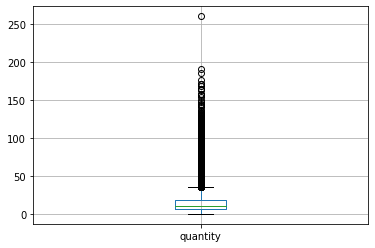

In [50]:
order_quantity = pd.DataFrame(order_quantity)
order_quantity.boxplot()

We have found that there are some strange activity, because our minimal receipt is equal to 0 and maximum to 48005 RUB 

In [51]:
order_quantity[order_quantity["quantity"] > 200]

,quantity
id_order,
5846282,260.872


In [52]:
df_online[df_online.id_order==5846282]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
13293188,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,371,426,22.000,616.00,False,NaN,22103416.0
13293474,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,731,17268,0.208,18.30,False,NaN,1549442.0
13293534,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,1225,15554,4.000,372.00,False,NaN,12195934.0
13293560,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,1665,12091,3.000,273.00,False,NaN,1054269.0
13293700,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,15146,15747,1.000,86.00,False,NaN,3312519.0
13293701,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,15147,15747,1.000,66.00,False,NaN,3661323.0
13293837,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,15923,12774,0.522,81.43,False,NaN,2199529.0
13293949,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,17151,19317,4.000,612.00,False,NaN,9320686.0
13294008,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,18222,17394,0.562,111.28,False,NaN,8248892.0
13294066,2020-09-10 12:48:57,364A8E8E-4BF3-EA11-B444-005056A7539A,5846282,3258801,18504,271,4.000,160.00,False,NaN,325093.0


In [54]:
# let's choose left and right hand site tails according to quantiles and investigate them
lhs_suspects = order_quantity[order_quantity["quantity"] <= order_quantity.quantile(0.05)["quantity"]]
rhs_suspects = order_quantity[order_quantity["quantity"] >= order_quantity.quantile(0.95)["quantity"]]

### Lower Quantile

In [55]:
lhs_suspects.describe()

,quantity
count,34710.000000
mean,2.327741
std,0.722863
min,0.100000
25%,2.000000
50%,2.424000
75%,3.000000
max,3.000000


<AxesSubplot:>

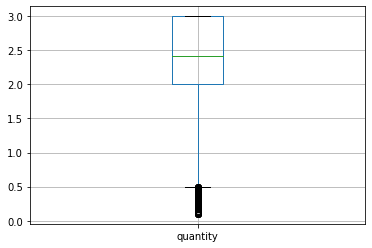

In [56]:
lhs_suspects.boxplot()

In [57]:
df_online.loc[df_online['quantity']==0]

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
76223,2020-09-01 19:48:39,FB34A539-74EC-EA11-B444-005056A7539A,5588920,0586045,15738,19687,0.0,0.79,False,1621111.0,5190639.0
6896972,2020-09-06 10:36:35,BF84C9D8-13F0-EA11-B444-005056A7539A,5724850,4467987,730,17226,0.0,0.28,False,NaN,9079209.0
14016776,2020-09-11 19:59:23,7032851D-51F4-EA11-B444-005056A7539A,5938655,1320557,16645,18308,0.0,0.08,False,NaN,18211174.0
14017496,2020-09-11 12:26:59,7646C422-12F4-EA11-B444-005056A7539A,5908652,6415031,21335,16860,0.0,0.30,False,NaN,22774765.0
28965048,2020-09-21 18:49:38,06C66F45-23FC-EA11-B444-005056A7539A,6311981,8130180,609,15861,0.0,0.48,False,NaN,NaN
39351797,2020-09-29 12:52:07,4F4AA195-3902-EB11-B444-005056A7539A,6596391,4042915,738,19230,0.0,0.39,False,NaN,NaN


### Upper Quantile

In [58]:
rhs_suspects.describe()

,quantity
count,25178.000000
mean,45.574823
std,12.572768
min,34.230000
25%,37.247000
50%,41.680500
75%,49.417500
max,260.872000


<AxesSubplot:>

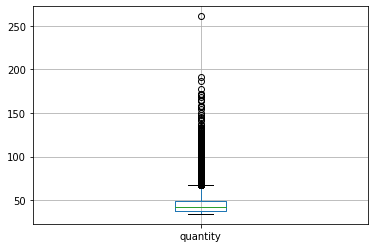

In [59]:
rhs_suspects.boxplot()

In [63]:
rhs_suspect_outliers = rhs_suspects[rhs_suspects["quantity"] >= 70]

In [64]:
rhs_suspect_outliers.describe()

,quantity
count,1207.000000
mean,85.353947
std,17.500874
min,70.000000
25%,73.877500
50%,80.000000
75%,90.946500
max,260.872000


In [65]:
rhs_suspect_outliers

,quantity
id_order,
340237,75.862
396783,70.944
602691,83.336
1081817,143.792
1552779,111.000
...,...
6663098,84.435
6664597,75.723
6665385,77.380


### Find Outlisers / bots

In [66]:
def get_info_from_previous_orders(previous_orders):
    orders = {}
    for id_order in previous_orders.index:
        order = df_online[df_online.id_order==id_order]
        order_len = order.shape[0]
        orders[id_order] = {"order_len": order_len, "order_quantity": previous_orders[id_order]}
    return orders

In [67]:
# Collect order history
orders_info = {}
for id_order in rhs_suspect_outliers.index:
    suspect_order = df_online[df_online.id_order==id_order]
    id_card = suspect_order.id_card.iloc[0]
    suspect_order_length = suspect_order.shape[0]
    previous_orders = df_online[df_online.id_card == id_card].groupby(["id_order"])["quantity"].sum()
    previous_orders = get_info_from_previous_orders(previous_orders)
    orders_info[id_card] = {"suspect_order_length": suspect_order_length,
                            "suspect_order_id": id_order,
                            "previous_orders": previous_orders}

In [68]:
potential_bots = []
for suspect_user in orders_info:
    if len(orders_info[suspect_user]['previous_orders'])==1:
        potential_bots.append(suspect_user)

In [69]:
suspects = pd.DataFrame({'id_card': potential_bots})
suspects

,id_card
0,0939026
1,8382225
2,2451998
3,5954482
4,8915968
...,...
170,0283129
171,a051478
172,A019186
173,C502839


In [70]:
with bz2.open(data_path / 'suspected_bots.pkl.bz2', 'wb') as file:
    pickle.dump(df, file, protocol=4)